In [25]:
import numpy as np
import matplotlib.pyplot as plt

### visualize method

In [26]:
def vis_data_classifier(data, labels, w, b, x_label, y_label, dataset_num):
  x = list(data[:, 0])
  y = list(data[:, 1])
  map_class = {'-1' : -1, '1' : 1}
  c = [i for i in list(labels)]
  plt.figure(figsize=(12,6))
  x_range = np.linspace(-2, 2, 100)
  y_range = [(0-b-(w[0]*i))/w[1] for i in x_range]
  xo = []
  yo = []
  for i, v in enumerate(y_range):
    if -4 <= v <= 4:
      xo.append(x_range[i])
      yo.append(y_range[i])
  l1 = plt.plot(xo, yo, 'r', label='classifier')
  legend1 = plt.legend(loc='lower right')
  scatter = plt.scatter(x, y, c=c)
  plt.legend(handles=scatter.legend_elements()[0], labels=list(map_class.keys()), loc='upper right')
  plt.gca().add_artist(legend1)
  plt.title('Adaline classification dataset '+str(dataset_num))
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()

### generate data

In [27]:
def gen_class_data(m, c, n):
  mean = [m, m]
  cov = [[c, 0], [0, c]]  # diagonal covariance
  return np.random.multivariate_normal(mean, cov, n)

def gen_data1():
  class1 = gen_class_data(1, 0.25, 1000)
  class2 = gen_class_data(-1, 0.25, 10)
  yclass1 = np.ones((1000,1)).T[0]
  yclass2 = -1*np.ones((10,1)).T[0]
  x = np.append(class1, class2, axis=0)
  y = np.append(yclass1, yclass2, axis=0)
  return x, y

def gen_data2():
  class1 = gen_class_data(1, 0.25, 100)
  class2 = gen_class_data(-1, 0.25, 100)
  yclass1 = np.ones((100,1)).T[0]
  yclass2 = -1*np.ones((100,1)).T[0]
  x = np.append(class1, class2, axis=0)
  y = np.append(yclass1, yclass2, axis=0)
  return x, y

x1, y1 = gen_data1()
x2, y2 = gen_data2()

### learn Adaline

In [28]:
def cal_cost(x, y, w, b):
    return 0.5*sum((np.dot(x,w)+b-y)**2)

In [29]:
def learn(x, y, a=0.002, tol=10e-4):
  w = np.array([2*np.random.rand() for i in range(x.shape[1])])
  b = 0
  epoch_count = 0
  cost = cal_cost(x, y, w, b)

  while cost > tol:
    print('epoch ', epoch_count)
    epoch_count += 1
    for i, s in enumerate(x):
      net = np.dot(s,w)+b
      w = w + a*(y[i]-net)*s
      b = b + a*(y[i]-net)
    cost = cost - cal_cost(x, y, w, b)
    print('diff cost: ', cost)
  return w, b

w, b = learn(x1, y1)

epoch  0
diff cost:  38.49525959303367
epoch  1
diff cost:  6.251550280505725
epoch  2
diff cost:  -20.095823163742164


### classify dataset 1

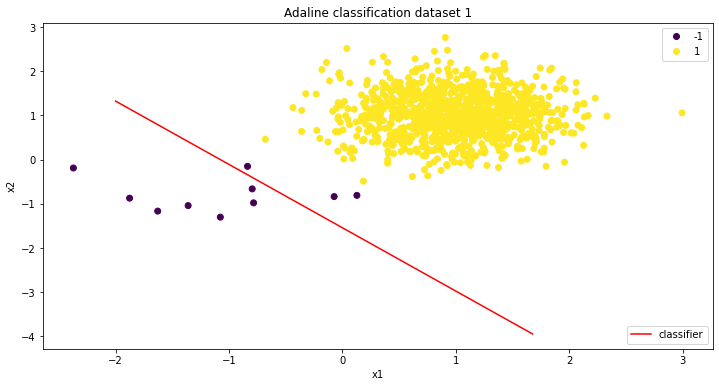

In [30]:
vis_data_classifier(x1, y1, w, b, 'x1', 'x2', 1)

### classify dataset 2

In [ ]:
w, b = learn(x2, y2)

epoch  0
diff cost:  141.17845258235303
epoch  1
diff cost:  118.35122761524173
epoch  2
diff cost:  100.81715768035941
epoch  3
diff cost:  84.85189889617108
epoch  4
diff cost:  69.73539650967065
epoch  5
diff cost:  55.26753761978834
epoch  6
diff cost:  41.34131241019111
epoch  7
diff cost:  27.873366995700227
epoch  8
diff cost:  14.793186004628643
epoch  9
diff cost:  2.040784816582452
epoch  10
diff cost:  -10.434662686671103


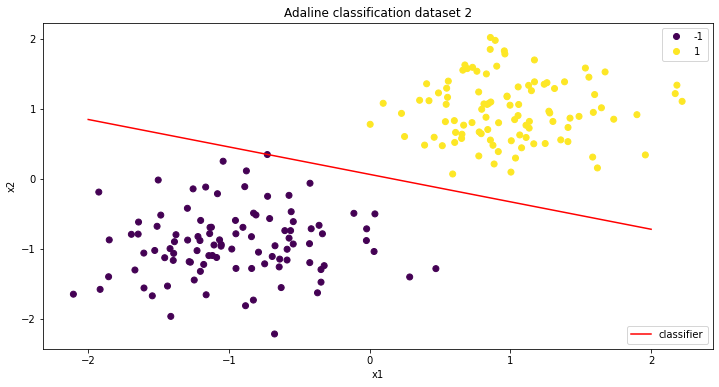

In [ ]:
vis_data_classifier(x2, y2, w, b, 'x1', 'x2', 2)

### Response for suitable robustness in situations where the distribution and number of samples of the two classes are not close

Replace the “sign” function with a “soft sign” such as “tanh”.

In [ ]:
def cal_soft_cost(x, y, w, b, g):
    return 0.5*sum((np.tanh(g*(np.dot(x,w)+b))-y)**2)

In [ ]:
def soft_learn(x, y , a=0.002, tol=10e-6, g=100):
  w = np.array([2*np.random.rand() for i in range(x.shape[1])])
  b = 0
  epoch_count = 0
  cost = cal_soft_cost(x, y, w, b, g)

  while cost > tol:
    print('epoch ', epoch_count)
    epoch_count += 1
    for i, s in enumerate(x):
      net = np.dot(s,w)+b
      h = np.tanh(g*net)
      w = w + a*(1-(h**2))*g*(y[i]-h)*s
      b = b + a*(1-(h**2))*g*(y[i]-h)
    cost = cost - cal_soft_cost(x, y, w, b, g)
    print('diff cost: ', cost)
  return w, b

In [ ]:
w, b = soft_learn(x1, y1)

epoch  0
diff cost:  0.0


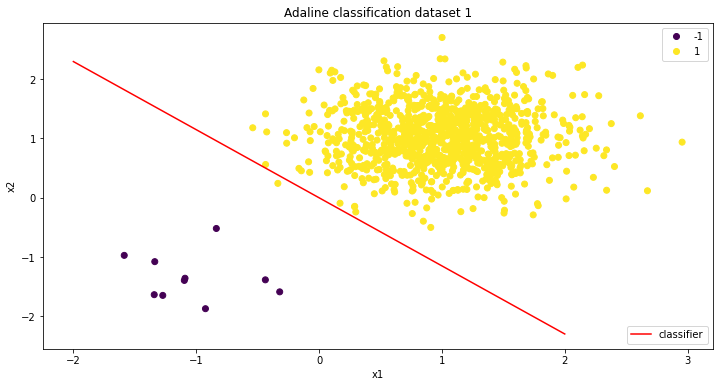

In [ ]:
vis_data_classifier(x1, y1, w, b, 'x1', 'x2', 1)

In [ ]:
w, b = soft_learn(x2, y2)

epoch  0
diff cost:  6.217248937900877e-15


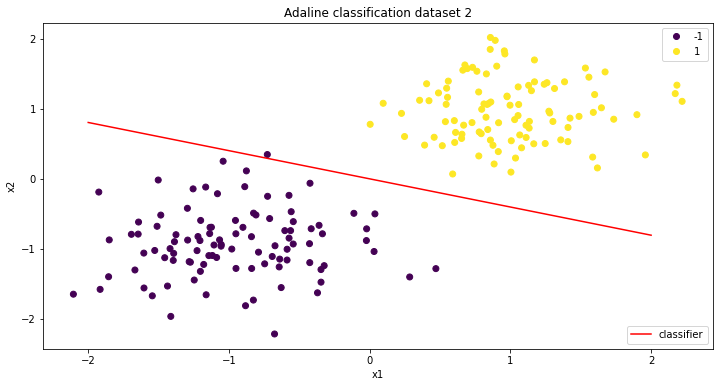

In [ ]:
vis_data_classifier(x2, y2, w, b, 'x1', 'x2', 2)